# 영화 평점에 대한 평점 변화 (시각화) [실습]

In [1]:
from urllib.request import urlopen
from bs4 import  BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

In [2]:
base_url = 'https://movie.naver.com/'
sub_url  = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20170501'
# sub_url을 활용하여 다른 날짜 정보도 가져올 수 있게 해준다.

try:
    html = urlopen(base_url+sub_url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [3]:
# soup.find_all('div', 'tit5')               - div 태그의 클래스가 tit5 인 모든 정보를 가져온다.
# soup.find_all('div', 'tit5')[0]            - 전부 가져온다.
# soup.find_all('div', 'tit5')[0].a          - a 태그만 가져온다.
# soup.find_all('div', 'tit5')[0].a.string   - a 태그의 텍스트만 가져온다. (get_text()와 동일)
soup.find_all('div', 'tit5')[0].a.get_text()

'히든 피겨스'

## 평점 추출하기

In [4]:
soup.find_all('td','point')[0].string

'9.38'

>dataframe 을 만들기 위해서는 셀의 길이가 동일해야 하므로 length 확인 필요

In [5]:
print('Movie_name : ', len(soup.find_all('div', 'tit5')))
print('rating : ', len(soup.find_all('td', 'point')))

Movie_name :  50
rating :  50


In [6]:
move_names = [soup.find_all('div', 'tit5')[n].a.get_text() for n in range(0,50)]
print(len(move_names))
print(move_names)

50
['히든 피겨스', '사운드 오브 뮤직', '시네마 천국', '미스 슬로운', '잉여들의 히치하이킹', '나, 다니엘 블레이크', '바람과 함께 사라지다', '오즈의 마법사', '벤허', '흑집사 : 북 오브 더 아틀란틱', '우리들', '일 포스티노', '댄서', '라이언', '코알라', '로건', '더 플랜', '분노의 질주: 더 익스트림', '시카고', '10분', '해리가 샐리를 만났을 때', '미녀와 야수', '너의 이름은.', '그랑블루', '한공주', '연애담', '포켓몬 더 무비 XY&Z; 「볼케니온 : 기계왕국의 비밀」', '리틀 프린세스 소피아: 엘레나와 비밀의 아발로 왕국', '분노', '맨체스터 바이 더 씨', '행복 목욕탕', '스머프: 비밀의 숲', '부당거래', '파닥파닥', '아비정전', '패션 오브 크라이스트', '라라랜드', '뽀로로 극장판 슈퍼썰매 대모험', '족구왕', '가디언즈 오브 갤럭시', '자전거 탄 소년', '오두막', '성실한 나라의 앨리스', '원라인', '존 윅 - 리로드', '사일런스', '클로저', '임금님의 사건수첩', '문라이트', '로미오와 줄리엣']


In [7]:
move_points = [soup.find_all('td', 'point')[n].get_text() for n in range(0,50)]
print(len(move_points))
print(move_points)

50
['9.38', '9.36', '9.29', '9.26', '9.25', '9.25', '9.24', '9.23', '9.22', '9.20', '9.18', '9.17', '9.14', '9.07', '9.07', '9.06', '9.04', '9.02', '8.92', '8.89', '8.89', '8.85', '8.81', '8.78', '8.78', '8.76', '8.75', '8.73', '8.73', '8.72', '8.70', '8.67', '8.66', '8.65', '8.59', '8.59', '8.59', '8.56', '8.56', '8.56', '8.54', '8.48', '8.39', '8.29', '8.28', '8.26', '8.20', '8.17', '8.12', '8.10']


In [8]:
import pandas as pd

In [9]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [10]:
import urllib
from tqdm import tqdm_notebook
import time

In [11]:
for n in tqdm_notebook(range(100)) :
    time.sleep(0.1)

C:\Users\Hansol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [12]:
for x in tqdm_notebook(range(2), desc='outer') :
    for y in tqdm_notebook(range(500), desc='inner') :
        time.sleep(0.1)

C:\Users\Hansol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\Users\Hansol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [13]:
names_result  = []
points_result = []
date_result   = []

In [14]:
base_url = 'https://movie.naver.com/'
sub_url  = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='
for day in tqdm_notebook(date) :
    html = base_url+sub_url+'{date}'
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    end  = len(soup.find_all('td', 'point'))
    names_result.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    points_result.extend([soup.find_all('td', 'point')[n].string for n in range(0,end)])
    date_result.extend([day for n in range(0,end)])
    
    # append 가 아니라 extend 를 사용 > list 안에 또다른 list 가 들어가는 것을 방지, elements 만 들어가게 해준다.

C:\Users\Hansol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
print(len(names_result))
print(len(points_result))
print(len(date_result))

4723
4723
4723


In [16]:
movieDF = pd.DataFrame({'date' : date_result, 'name' : names_result, 'point' : points_result})
movieDF

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
5,2017-05-01,"나, 다니엘 블레이크",9.25
6,2017-05-01,바람과 함께 사라지다,9.24
7,2017-05-01,오즈의 마법사,9.23
8,2017-05-01,벤허,9.22
9,2017-05-01,흑집사 : 북 오브 더 아틀란틱,9.20


In [17]:
movieDF.info()
# dataframe 의 요약 정보. description, describe 같은 함수로 보면 된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


>astype() 함수를 이용해서 컬럼의 타입을 변경할 수 있다.

In [18]:
# movieDF['point']
# type(movieDF['point'])
movieDF['point'] = movieDF['point'].astype(float)

In [19]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

>내가 원하는 영화의 평점의 총점을 확인하기
>피봇 테이블을 이용할 수 있다.

In [21]:
movie_pivot = pd.pivot_table(movieDF, index = ['name'], aggfunc=np.sum)
movie_pivot

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48
7인의 사무라이,36.60
8 마일,195.36
가디언즈 오브 갤럭시,34.22
가디언즈 오브 갤럭시 VOL. 2,484.45


>결과에 대한 정렬이 필요한 경우 sort_value(by=, ascending=)

In [22]:
movie_pivot_sort = movie_pivot.sort_values(by='point', ascending=False)
movie_pivot_sort.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [23]:
temp = movieDF.query('name == ["덩케르크"]')
temp

,date,name,point
3773,2017-07-20,덩케르크,8.31
3821,2017-07-21,덩케르크,8.25
3873,2017-07-22,덩케르크,8.18
3921,2017-07-23,덩케르크,8.14
3970,2017-07-24,덩케르크,8.11
4024,2017-07-25,덩케르크,8.09
4072,2017-07-26,덩케르크,8.13
4120,2017-07-27,덩케르크,8.18
4170,2017-07-28,덩케르크,8.20
4217,2017-07-29,덩케르크,8.22


## 시각화

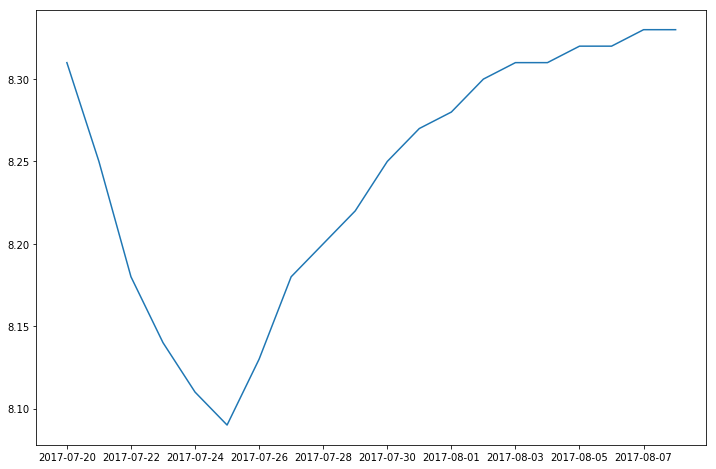

In [24]:
plt.figure(figsize=(12,8))
# 틀을 만드는 작업

plt.plot(temp['date'], temp['point'])


## 영화별 날짜 변화에 따른 평점 변화 시각화 [실습]

In [25]:
movie_date_point_pivot = pd.pivot_table(movieDF, index=['date'], columns=['name'], values=['point'])
movie_date_point_pivot

point                                                         \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이  8 마일   
date                                                                      
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-06  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-07  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-08  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-09  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-10  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-11  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-12  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-13  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-14  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-15   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-16   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-17   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-18   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-19   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-20   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-21   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-22   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-23   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-24   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-25   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-26   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-27   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-28   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-29   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-30   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
...          ...   ...      ...          ...         ...      ...   ...   
2017-07-10   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-11   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-12   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-13   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-14   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-15   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-16   NaN   NaN      NaN         8.58        7.85      NaN   NaN   
2017-07-17   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-18   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-19   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-20   NaN  7.48      NaN          NaN        7.84      NaN   NaN   
2017-07-21   NaN  7.34      NaN          NaN        7.84      NaN   NaN   
2017-07-22   NaN  7.79      NaN          NaN        7.84      NaN   NaN   
2017-07-23   NaN  7.58      NaN          NaN        7.84      NaN   NaN   
2017-07-24   NaN  7.55      NaN          NaN        7.84     9.15   NaN   
2017-07-25   NaN  7.53      NaN          NaN        7.84     9.15   NaN   
2017-07-26   NaN  7.48      NaN          NaN        7.84     9.15   NaN   
2017-07-27   NaN  7.49      NaN          NaN        7.85     9.15   NaN   
2017-07-28   NaN  7.46      NaN          NaN        7.85      NaN   NaN   
2017-07-29   NaN  7.45      NaN     

In [26]:
movie_date_point_pivot.colums = movie_date_point_pivot.columns.droplevel()
movie_date_point_pivot.head()

C:\Users\Hansol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                           \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ...   하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                            
2017-05-01        8.56                NaN  NaN  ...          NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...          NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...          NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...          NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...          NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [27]:


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [28]:
target_col = ['행복 목욕탕', '흑집사 : 북 오브 더 아틀란틱']
plt.figure(figsize=(12,8))
plt.plot(movie_date_point_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

KeyError: "['행복 목욕탕' '흑집사 : 북 오브 더 아틀란틱'] not in index"

<Figure size 864x576 with 0 Axes>